In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
dt=pd.DataFrame(data["data"], columns=data["feature_names"])
dt["Diagnosis"]=np.where(data.target==1, "Malignant", "Bening")
dt.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')

In [9]:
print(data["target"][0:5]) #es la variable target
print(data["data"].shape)
print(data["feature_names"]) #variables
print(data["target_names"]) #significado del target


[0 0 0 0 0]
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [10]:
data.keys() #objeto Bunch

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
dt.head().T

,0,1,2,3,4
mean radius,17.99,20.57,19.69,11.42,20.29
mean texture,10.38,17.77,21.25,20.38,14.34
mean perimeter,122.8,132.9,130.0,77.58,135.1
mean area,1001.0,1326.0,1203.0,386.1,1297.0
mean smoothness,0.1184,0.08474,0.1096,0.1425,0.1003
mean compactness,0.2776,0.07864,0.1599,0.2839,0.1328
mean concavity,0.3001,0.0869,0.1974,0.2414,0.198
mean concave points,0.1471,0.07017,0.1279,0.1052,0.1043
mean symmetry,0.2419,0.1812,0.2069,0.2597,0.1809
mean fractal dimension,0.07871,0.05667,0.05999,0.09744,0.05883


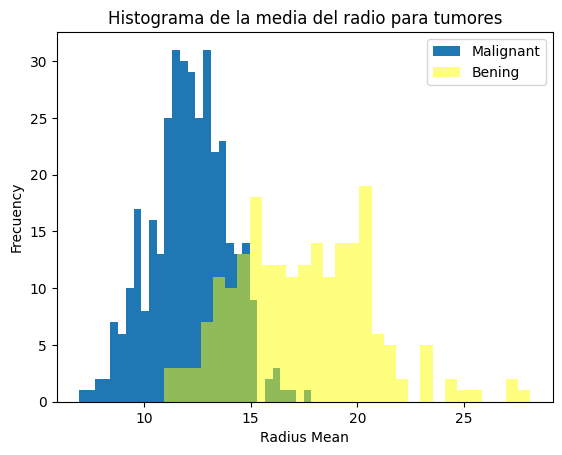

In [16]:
m = plt.hist(dt.loc[dt["Diagnosis"]=="Malignant", "mean radius"],
             bins=30,
             label= "Malignant")

b = plt.hist(dt.loc[dt["Diagnosis"]=="Bening", "mean radius"],
             bins=30,
             label= "Bening",
             fc = (1,1,0,0.5))

plt.legend()
plt.xlabel("Radius Mean")
plt.ylabel("Frecuency")
plt.title("Histograma de la media del radio para tumores")

plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [18]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
X=dt.drop("Diagnosis", axis=1)
y=data["target"] #0 o 1
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)


In [22]:
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21]}

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [24]:
model=KNeighborsClassifier()
print(model.get_params())

params = {'n_neighbors': np.arange(3,50,2), "p":[1,2,3,4]}
scoring = ["accuracy", "roc_auc"]



{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [25]:
#GRID SEARCH CON CROSS VALIDATION

n_cv=5 #5 folds

grid_solver = GridSearchCV(estimator=model, param_grid = params, scoring=scoring, cv=n_cv, refit="roc_auc", verbose=2) #model es el knn #params, viene de la variable anterior


model_result = grid_solver.fit(X_train, y_train)

print("Mejor score:",model_result.best_score_)
print("Mejores parámetros:", model_result.best_params_)





Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END .................................n_neighbors=3, p=1; total time=   0.4s
[CV] END .................................n_neighbors=3, p=1; total time=   0.1s
[CV] END .................................n_neighbors=3, p=1; total time=   0.1s
[CV] END .................................n_neighbors=3, p=1; total time=   0.1s
[CV] END .................................n_neighbors=3, p=1; total time=   0.1s
[CV] END .................................n_neighbors=3, p=2; total time=   0.2s
[CV] END .................................n_neighbors=3, p=2; total time=   0.2s
[CV] END .................................n_neighbors=3, p=2; total time=   0.1s
[CV] END .................................n_neighbors=3, p=2; total time=   0.1s
[CV] END .................................n_neighbors=3, p=2; total time=   0.0s
[CV] END .................................n_neighbors=3, p=3; total time=   0.2s
[CV] END .................................n_nei

In [27]:
print("Train score:",model_result.score(X_train, y_train))
print("Test score:",model_result.score(X_test, y_test))



Train score: 0.984969696969697
Test score: 0.9839939024390244


In [29]:
#predicción de la y en el train
y_pred=model_result.predict(X_train)
probs=model_result.predict_proba(X_train)
print("Train AUC:", sklearn.metrics.roc_auc_score(y_train, probs[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train, y_pred))

#predicción de la y en el test
model_result.score(X_test, y_test)
y_pred=model_result.predict(X_test)
probs=model_result.predict_proba(X_test)
print("Test AUC:", sklearn.metrics.roc_auc_score(y_test, probs[:,1]))
print("Test Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))


Train AUC: 0.984969696969697
Train Accuracy: 0.9296703296703297
Test AUC: 0.9839939024390244
Test Accuracy: 0.9473684210526315


In [31]:
best_model = model_result.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=21, p=1)

In [41]:
final_model = best_model.fit(X,y)

In [34]:
results=model_result.cv_results_
results=pd.DataFrame(results)

In [39]:
results.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
mean_fit_time,0.00563,0.009137,0.006114,0.004083,0.003893,0.004643,0.007716,0.007204,0.012384,0.009061,...,0.003036,0.002709,0.002841,0.00243,0.002885,0.002813,0.003091,0.002637,0.00302,0.003648
std_fit_time,0.003371,0.007026,0.003077,0.00055,0.000353,0.003079,0.003874,0.004,0.002694,0.005336,...,0.000774,0.000261,0.00044,0.000108,0.000451,0.000308,0.000843,0.000457,0.000609,0.001175
mean_score_time,0.179946,0.118306,0.243536,0.20391,0.145691,0.134393,0.181854,0.272114,0.208236,0.221088,...,0.064347,0.062663,0.018388,0.014776,0.066438,0.063642,0.017368,0.014909,0.066968,0.063831
std_score_time,0.107119,0.06956,0.049986,0.094533,0.02692,0.100744,0.073454,0.026112,0.041156,0.043867,...,0.003875,0.002048,0.002073,0.000446,0.005855,0.002551,0.000767,0.000424,0.006666,0.00225
param_n_neighbors,3,3,3,3,5,5,5,5,7,7,...,45,45,47,47,47,47,49,49,49,49
param_p,1,2,3,4,1,2,3,4,1,2,...,3,4,1,2,3,4,1,2,3,4
params,"{'n_neighbors': 3, 'p': 1}","{'n_neighbors': 3, 'p': 2}","{'n_neighbors': 3, 'p': 3}","{'n_neighbors': 3, 'p': 4}","{'n_neighbors': 5, 'p': 1}","{'n_neighbors': 5, 'p': 2}","{'n_neighbors': 5, 'p': 3}","{'n_neighbors': 5, 'p': 4}","{'n_neighbors': 7, 'p': 1}","{'n_neighbors': 7, 'p': 2}",...,"{'n_neighbors': 45, 'p': 3}","{'n_neighbors': 45, 'p': 4}","{'n_neighbors': 47, 'p': 1}","{'n_neighbors': 47, 'p': 2}","{'n_neighbors': 47, 'p': 3}","{'n_neighbors': 47, 'p': 4}","{'n_neighbors': 49, 'p': 1}","{'n_neighbors': 49, 'p': 2}","{'n_neighbors': 49, 'p': 3}","{'n_neighbors': 49, 'p': 4}"
split0_test_accuracy,0.879121,0.89011,0.89011,0.89011,0.901099,0.901099,0.89011,0.89011,0.901099,0.89011,...,0.846154,0.835165,0.857143,0.846154,0.846154,0.846154,0.857143,0.846154,0.846154,0.846154
split1_test_accuracy,0.956044,0.945055,0.945055,0.945055,0.956044,0.956044,0.956044,0.956044,0.956044,0.956044,...,0.945055,0.934066,0.934066,0.934066,0.934066,0.934066,0.934066,0.934066,0.934066,0.934066
split2_test_accuracy,0.967033,0.967033,0.945055,0.945055,0.967033,0.967033,0.956044,0.956044,0.967033,0.956044,...,0.967033,0.967033,0.956044,0.956044,0.956044,0.967033,0.956044,0.956044,0.967033,0.967033


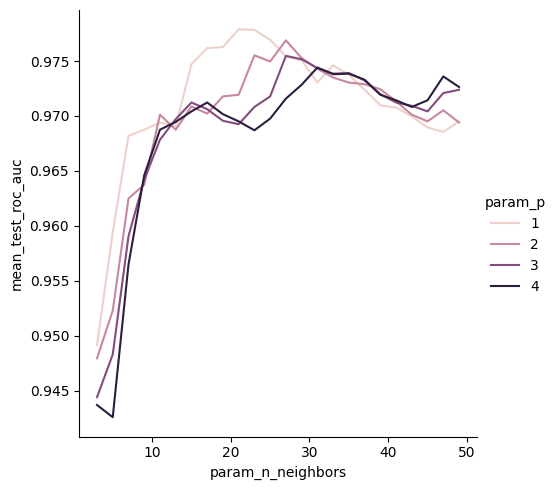

In [40]:
sns.relplot(x="param_n_neighbors", y="mean_test_roc_auc", hue="param_p", kind="line", data=results)
